In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import seaborn as sns
import pandas as pd
import random
import statistics
import gzip
from collections import Counter
import scipy
import scipy.stats

In [13]:
from platform import python_version
print(python_version())
import matplotlib
print (matplotlib.__version__)
print (np.__version__)
print (sns.__version__)
print (pd.__version__)
print (scipy.__version__)
import statsmodels
print (statsmodels.__version__)
import neutcurve
print (neutcurve.__version__)


3.9.13
3.9.4
2.0.2
0.13.2
2.2.3
1.13.1
0.14.4
2.1.0


In [3]:
b2AR_df = pd.read_csv('b2AR_all_data_annot.csv.gz', compression = 'gzip', index_col=0, low_memory=False)

b2AR_df_filt = b2AR_df.loc[(b2AR_df['Nb80_isoP1_norm_Gal4_reads']>2e-05) & \
                        (b2AR_df['surfexp_min_cells']>=50)] 

b2AR_df_filt_missense = b2AR_df_filt.loc[(b2AR_df_filt['syn_WT'] == False) & \
                                        (b2AR_df_filt['stop'] == False) & \
                                        (b2AR_df_filt['del'] == False)].copy()

print (len(b2AR_df_filt))

7851


In [4]:
print (len(b2AR_df))
print (len(b2AR_df.loc[b2AR_df['surfexp_min_cells']>=50]))
print (len(b2AR_df.loc[b2AR_df['Nb80_isoP1_norm_Gal4_reads']>2e-05]))

9087
8741
7851


In [5]:
b2AR_df.loc[b2AR_df['surfexp_min_cells']>=50]

,surfexp_rep1_score,surfexp_rep1_norm_score,surfexp_rep1_bc_count,surfexp_rep1_cells_count,surfexp_rep2_score,surfexp_rep2_norm_score,surfexp_rep2_bc_count,surfexp_rep2_cells_count,surfexp_rep3_score,surfexp_rep3_norm_score,...,gnomAD,gnomAD_AF,topo,Transmembrane,WT_aa,mut_aa,mut_hydro,mut_size,GPCRdb,WT_hydro
WT,3.592946,1.000000,25852,1.925662e+06,3.594746,1.000000,25852,2.948000e+06,3.220785,1.000000,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G2A,3.707565,1.108494,9,1.732526e+02,3.806457,1.176826,9,2.119473e+02,3.283562,1.061008,...,False,NaN,Nterm,False,G,A,1.8,89.0,NaN,-0.4
G2V,3.509929,0.921420,2,1.856773e+02,3.861995,1.223212,2,2.754382e+02,2.891032,0.679540,...,False,NaN,Nterm,False,G,V,4.2,117.0,NaN,-0.4
G2I,3.958094,1.345634,4,5.695629e+01,3.863355,1.224348,4,1.122747e+02,3.073998,0.857350,...,False,NaN,Nterm,False,G,I,4.5,131.0,NaN,-0.4
G2L,3.819531,1.214476,7,3.980500e+02,3.740010,1.121328,7,7.224437e+02,3.331359,1.107459,...,False,NaN,Nterm,False,G,L,3.8,131.0,NaN,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L413K,3.748564,1.147302,14,9.770323e+02,3.529434,0.945450,14,1.206127e+03,3.195142,0.975080,...,False,NaN,Cterm,False,L,K,-3.9,146.0,NaN,3.8
L413D,3.684696,1.086847,20,1.073857e+03,3.620911,1.021854,20,1.845893e+03,3.247486,1.025949,...,False,NaN,Cterm,False,L,D,-3.5,133.0,NaN,3.8
L413E,3.671121,1.073997,14,3.480437e+02,3.683210,1.073887,14,3.922151e+02,3.273304,1.051039,...,False,NaN,Cterm,False,L,E,-3.5,147.0,NaN,3.8
L413*,3.580651,0.988362,31,2.693855e+03,3.632471,1.031509,31,4.469514e+03,3.191619,0.971656,...,False,NaN,Cterm,False,L,*,NaN,NaN,NaN,3.8


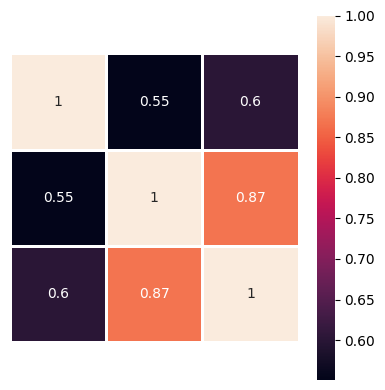

In [6]:
plt.figure(figsize=(4, 4))
sns.heatmap(b2AR_df_filt[['surfexp_reps_comb', 'Nb80_isoP_reps_comb', 'BArr_isoP_reps_comb']].corr(method='spearman'), annot=True, \
           linewidths=1, linecolor='white', square=True)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.savefig('Nb80_BArr_surfexp_corrs.png', dpi=250)

([], [])

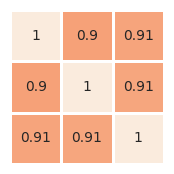

In [7]:
plt.figure(figsize=(2, 2))
sns.heatmap(b2AR_df_filt[['Nb80_isoP1_norm_comb_score', 'Nb80_isoP2_norm_comb_score', 'Nb80_isoP3_norm_comb_score',\
]].corr(method='pearson'), annot=True, \
           linewidths=1, linecolor='white', square=True, vmin=0.5, vmax=1, cbar=False)

plt.xticks([])
plt.yticks([])

#plt.savefig('b2AR_Nb80_reps_corr_pearson.png', dpi=250)

([], [])

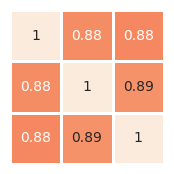

In [8]:
plt.figure(figsize=(2, 2))
sns.heatmap(b2AR_df_filt[['BArr_isoP1_norm_comb_score', 'BArr_isoP2_norm_comb_score', 'BArr_isoP3_norm_comb_score',\
]].corr(method='pearson'), annot=True, \
           linewidths=1, linecolor='white', square=True, vmin=0.5, vmax=1, cbar=False)

plt.xticks([])
plt.yticks([])
#plt.savefig('b2AR_BArr_reps_corr_pearson.png', dpi=250)

([], [])

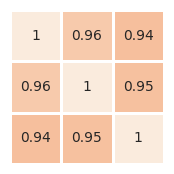

In [9]:
plt.figure(figsize=(2, 2))

b2AR_surfexp_filt = b2AR_df.loc[b2AR_df['surfexp_min_cells']>=50].copy()

sns.heatmap(b2AR_surfexp_filt[['surfexp_rep1_norm_score', 'surfexp_rep2_norm_score', 'surfexp_rep3_norm_score',\
]].corr(method='pearson'), annot=True, \
           linewidths=1, linecolor='white', square=True, vmin=0.5, vmax=1, cbar=False)

plt.xticks([])
plt.yticks([])
#plt.savefig('surfexp_reps_corr_pearson.png', dpi=250)

In [10]:
aas = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'R', 'H', 'K', 'D', 'E', '*', 'del']

b2AR_aa_seq = 'MGQPGNGSAFLLAPNRSHAPDHDVTQQRDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCLRRSSLKAYGNGYSSNGNTGEQSGYHVEQEKENKLLCEDLPGTEDFVGHQGTVPSDNIDSQGRNCSTNDSLL'
poss = list(range(1, (len(b2AR_aa_seq)+1)))
ordered_vars = []
for pos in poss:
    for aa in aas:
        ordered_vars.append(b2AR_aa_seq[pos-1]+str(pos)+ aa)
b2AR_just_vars_df = b2AR_df.drop('WT', axis=0)

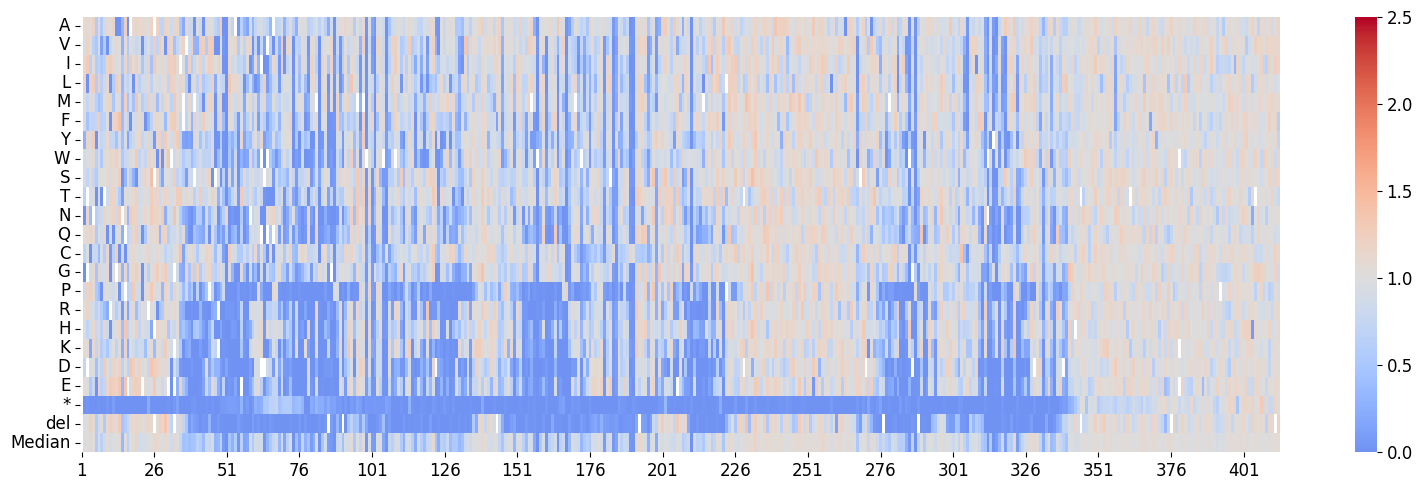

In [17]:
b2AR_surfexp_re = np.reshape(list(b2AR_just_vars_df['surfexp_reps_comb']), (len(b2AR_aa_seq), 22))
b2AR_surfexp_heatmap = pd.DataFrame(b2AR_surfexp_re, columns=aas,index=np.arange(1, 414)).T
b2AR_surfexp_heatmap.loc['Median'] = b2AR_surfexp_heatmap[:20].median(axis=0)

plt.figure(figsize=(16, 5))

ax = sns.heatmap(b2AR_surfexp_heatmap, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
#plt.savefig('b2AR_surfexp_heatmap.png', dpi=300)

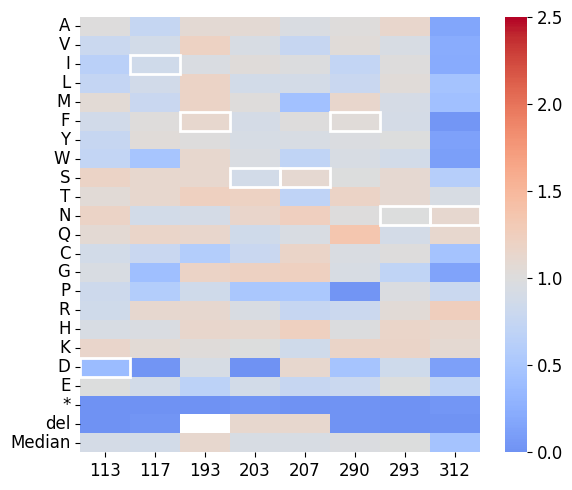

In [18]:
surfexp_lig_bind = b2AR_surfexp_heatmap[[113, 117, 193, 203, 207, 290, 293, 312]]

plt.figure(figsize=(6, 5))

ax = sns.heatmap(surfexp_lig_bind, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((0, 18), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((1, 2), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((2, 5), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((3, 8), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((4, 8), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((5, 5), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((6, 10), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((7, 10), 1, 1, fill=False, edgecolor='white', lw=2))

#plt.show()


plt.tight_layout()
#plt.savefig('surfexp_ligbind_zoom.png', dpi=250)

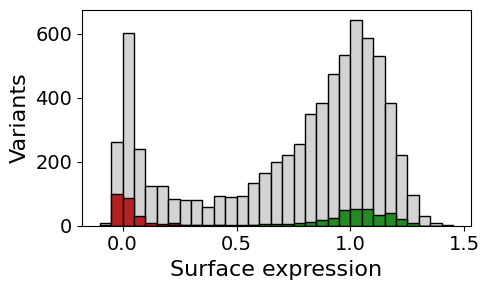

In [19]:
plt.figure(figsize=(5, 3))
plt.hist(b2AR_df_filt.loc[(b2AR_df_filt['syn_WT'] == False) & (b2AR_df_filt['stop'] == False)]['surfexp_reps_comb'], color='lightgray', bins=np.arange(-0.1, 1.5, 0.05), edgecolor='k', alpha=1)
plt.hist(b2AR_df_filt.loc[(b2AR_df_filt['stop'] == True) & (b2AR_df_filt['pos'] < 300)]['surfexp_reps_comb'], color='firebrick', bins=np.arange(-0.1, 1.5, 0.05), edgecolor='k', alpha=1)
plt.hist(b2AR_df_filt.loc[b2AR_df_filt['syn_WT'] == True]['surfexp_reps_comb'], color='forestgreen', bins=np.arange(-0.1, 1.5, 0.05), edgecolor='k', alpha=1)

#plt.axvline(x = 0.35, color='gray', linestyle='dashed', linewidth = 1)
#plt.axvline(x = 0.825, color='gray', linestyle='dashed', linewidth = 1)

plt.xticks([0,0.5, 1, 1.5], fontsize=14)
plt.yticks([0, 200, 400, 600], fontsize=14)
plt.xlabel('Surface expression', fontsize=16)
plt.ylabel('Variants', fontsize=16)
plt.tight_layout()
#plt.savefig('stop_syn_missense_histo_surfexp.png', dpi=300)

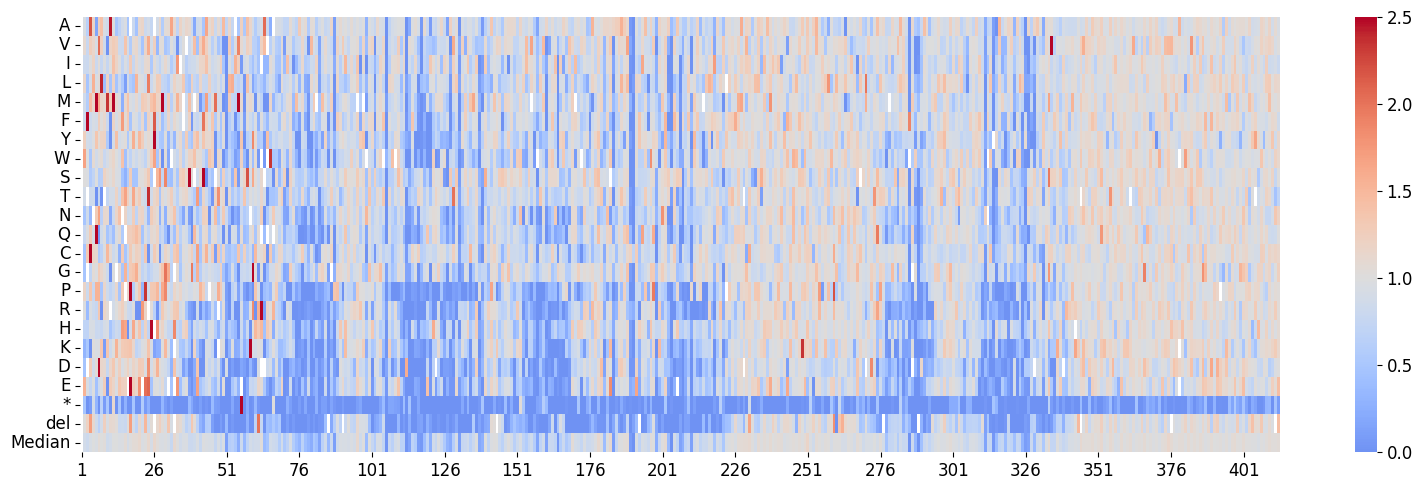

In [11]:
b2AR_Nb80_isoP_re = np.reshape(list(b2AR_just_vars_df['Nb80_isoP_reps_comb']), (len(b2AR_aa_seq), 22))
b2AR_Nb80_isoP_heatmap = pd.DataFrame(b2AR_Nb80_isoP_re, columns=aas, index=np.arange(1, 414)).T
b2AR_Nb80_isoP_heatmap.loc['Median'] = b2AR_Nb80_isoP_heatmap[:20].median(axis=0)

plt.figure(figsize=(16, 5))

ax = sns.heatmap(b2AR_Nb80_isoP_heatmap, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
#plt.savefig('b2AR_Nb80_isoP_heatmap_no_labels.png', dpi=300)

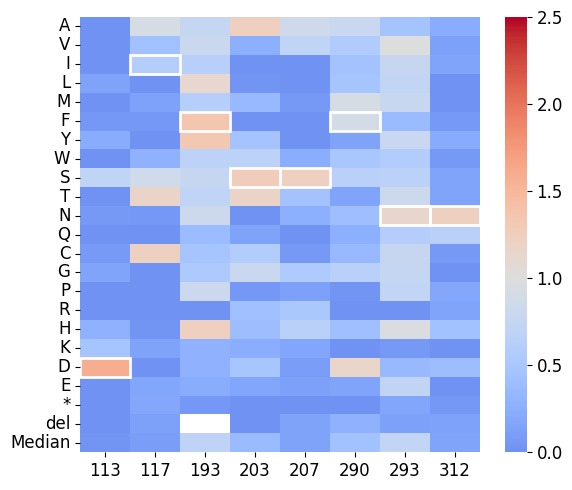

In [12]:
Nb80_lig_bind = b2AR_Nb80_isoP_heatmap[[113, 117, 193, 203, 207, 290, 293, 312]]

plt.figure(figsize=(6, 5))

ax = sns.heatmap(Nb80_lig_bind, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((0, 18), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((1, 2), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((2, 5), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((3, 8), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((4, 8), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((5, 5), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((6, 10), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((7, 10), 1, 1, fill=False, edgecolor='white', lw=2))

#plt.show()


plt.tight_layout()
#plt.savefig('Nb80_isoP_ligbind_zoom.png', dpi=250)

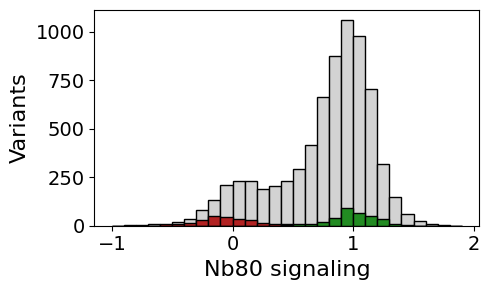

In [13]:
plt.figure(figsize=(5, 3))
plt.hist(b2AR_df_filt.loc[(b2AR_df_filt['syn_WT'] == False) & (b2AR_df_filt['stop'] == False)]['Nb80_isoP_reps_comb'], color='lightgray', bins=np.arange(-1, 2, 0.1), edgecolor='k', alpha=1)
plt.hist(b2AR_df_filt.loc[(b2AR_df_filt['stop'] == True) & (b2AR_df_filt['pos'] < 300)]['Nb80_isoP_reps_comb'], color='firebrick', bins=np.arange(-1, 2, 0.1), edgecolor='k', alpha=1)
plt.hist(b2AR_df_filt.loc[b2AR_df_filt['syn_WT'] == True]['Nb80_isoP_reps_comb'], color='forestgreen', bins=np.arange(-1, 2, 0.1), edgecolor='k', alpha=1)

#plt.axvline(x = 0.35, color='gray', linestyle='dashed', linewidth = 1)
#plt.axvline(x = 0.825, color='gray', linestyle='dashed', linewidth = 1)


plt.xticks([-1, 0, 1, 2], fontsize=14)
plt.yticks([0, 250, 500, 750, 1000], fontsize=14)
plt.xlabel('Nb80 signaling', fontsize=16)
plt.ylabel('Variants', fontsize=16)
plt.tight_layout()

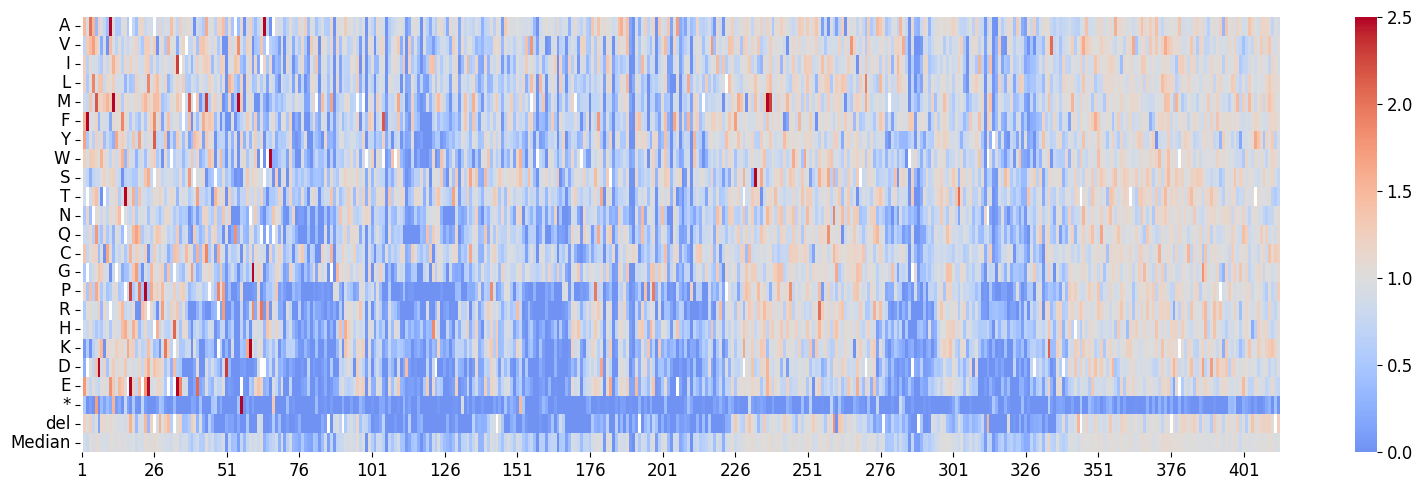

In [14]:
b2AR_BArr_isoP_re = np.reshape(list(b2AR_just_vars_df['BArr_isoP_reps_comb']), (len(b2AR_aa_seq), 22))
b2AR_BArr_isoP_heatmap = pd.DataFrame(b2AR_BArr_isoP_re, columns=aas, index=np.arange(1, 414)).T
b2AR_BArr_isoP_heatmap.loc['Median'] = b2AR_BArr_isoP_heatmap[:20].median(axis=0)

plt.figure(figsize=(16, 5))

ax = sns.heatmap(b2AR_BArr_isoP_heatmap, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
#plt.savefig('b2AR_BArr_isoP_heatmap.png', dpi=300)

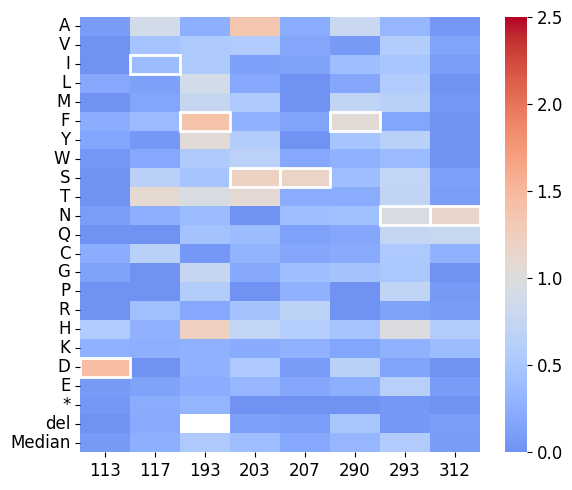

In [15]:
BArr_lig_bind = b2AR_BArr_isoP_heatmap[[113, 117, 193, 203, 207, 290, 293, 312]]

plt.figure(figsize=(6, 5))

ax = sns.heatmap(BArr_lig_bind, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((0, 18), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((1, 2), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((2, 5), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((3, 8), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((4, 8), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((5, 5), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((6, 10), 1, 1, fill=False, edgecolor='white', lw=2))
ax.add_patch(Rectangle((7, 10), 1, 1, fill=False, edgecolor='white', lw=2))

#plt.show()


plt.tight_layout()
#plt.savefig('BArr_isoP_ligbind_zoom.png', dpi=250)

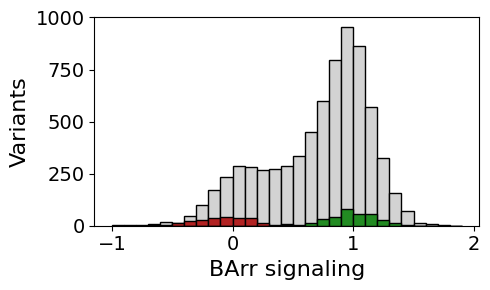

In [16]:
plt.figure(figsize=(5, 3))
plt.hist(b2AR_df_filt.loc[(b2AR_df_filt['syn_WT'] == False) & (b2AR_df_filt['stop'] == False)]['BArr_isoP_reps_comb'], color='lightgray', bins=np.arange(-1, 2, 0.1), edgecolor='k', alpha=1)
plt.hist(b2AR_df_filt.loc[(b2AR_df_filt['stop'] == True) & (b2AR_df_filt['pos'] < 300)]['BArr_isoP_reps_comb'], color='firebrick', bins=np.arange(-1, 2, 0.1), edgecolor='k', alpha=1)
plt.hist(b2AR_df_filt.loc[b2AR_df_filt['syn_WT'] == True]['BArr_isoP_reps_comb'], color='forestgreen', bins=np.arange(-1, 2, 0.1), edgecolor='k', alpha=1)

#plt.axvline(x = 0.35, color='gray', linestyle='dashed', linewidth = 1)
#plt.axvline(x = 0.825, color='gray', linestyle='dashed', linewidth = 1)


plt.xticks([-1, 0, 1, 2], fontsize=14)
plt.yticks([0, 250, 500, 750, 1000], fontsize=14)
plt.xlabel('BArr signaling', fontsize=16)
plt.ylabel('Variants', fontsize=16)
plt.tight_layout()
#plt.savefig('stop_syn_missense_histo_BArr.png', dpi=300)